In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [2]:
ep_path = Path('./echopype/test_data/ek60/')
ep_raw_File = str(ep_path.joinpath('DY1801_EK60-D20180211-T164025.nc'))
ep_Sv_file = str(ep_path.joinpath('DY1801_EK60-D20180211-T164025_Sv.nc'))
ev_test_path = Path('./echopype/test_data/ek60/from_echoview/')
ev_Sv_file = str(ev_test_path.joinpath('DY1801_EK60-D20180211-T164025-Sv18.csv'))
matlab_Sv_file = str(Path('./echopype/test_data/ek60/from_matlab/DY1801_EK60-D20180211-T164025_Sv_TS.nc'))

In [3]:
ds_raw = xr.open_dataset(ep_raw_File, group='Beam')
ds_env = xr.open_dataset(ep_raw_File, group='Environment')

In [4]:
ds_ep = xr.open_dataset(ep_Sv_file)

In [5]:
df_ev = pd.read_csv(ev_Sv_file, header=None, skiprows=[0])

,0,1,2,3,4,5,6,7,8,9,...,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397
0,0,-0.004250,1376.656000,2018-02-11,16:40:25,276.0,999.000000,999.000000,0.093824,259.986303,...,-94.284156,-98.074861,-99.584328,-113.922851,-103.873245,-107.252404,-106.845175,-105.544267,-112.698074,-104.188918
1,1,0.002039,1376.662196,2018-02-11,16:40:26,991.0,54.578766,-162.642338,0.093824,259.986303,...,-99.681530,-102.390408,-106.874898,-100.741029,-97.382286,-102.019656,-101.800570,-104.874005,-111.475139,-118.452566
2,2,0.008308,1376.668346,2018-02-11,16:40:28,706.0,54.578802,-162.642506,0.093824,259.986303,...,-95.601162,-94.464853,-94.269267,-94.861537,-99.052062,-88.602655,-96.215053,-101.393346,-92.790113,-101.860639
3,3,0.014289,1376.674455,2018-02-11,16:40:30,421.0,54.578837,-162.642666,0.093824,259.986303,...,-93.496304,-95.099838,-94.469170,-97.131021,-104.414158,-91.366016,-96.650135,-90.622116,-94.107120,-95.557823
4,4,0.020134,1376.680525,2018-02-11,16:40:32,136.0,54.578872,-162.642822,0.093824,259.986303,...,-98.399800,-100.638320,-99.502015,-100.882137,-102.391613,-108.839867,-99.107763,-103.168952,-100.210032,-88.784648
5,5,0.026291,1376.686314,2018-02-11,16:40:33,851.0,54.578907,-162.642988,0.093824,259.986303,...,-97.929441,-109.234137,-103.958670,-101.246666,-98.581702,-93.917716,-97.720203,-95.278674,-106.653956,-94.969874
6,6,0.032542,1376.692611,2018-02-11,16:40:35,567.0,54.578938,-162.643159,0.093824,259.986303,...,-91.908841,-94.711791,-94.821939,-105.491659,-99.804637,-97.139678,-97.449746,-99.100344,-95.318295,-108.645573
7,7,0.038494,1376.698889,2018-02-11,16:40:37,282.0,54.578966,-162.643322,0.093824,259.986303,...,-96.494845,-93.136088,-90.847402,-92.121694,-93.384231,-94.987784,-95.309611,-93.479549,-94.401094,-96.275121
8,8,0.044783,1376.704993,2018-02-11,16:40:38,997.0,54.578997,-162.643495,0.093824,259.986303,...,-94.801551,-97.616261,-93.352066,-92.756679,-92.937390,-102.066692,-92.075890,-99.641257,-97.187973,-111.209031
9,9,0.050928,1376.711097,2018-02-11,16:40:40,712.0,54.579025,-162.643664,0.093824,259.986303,...,-94.707479,-103.589825,-95.962561,-108.972318,-112.457304,-90.049010,-89.324288,-89.140484,-99.304591,-93.064919


In [6]:
ds_matlab = xr.open_dataset(matlab_Sv_file)
ds_matlab

<xarray.Dataset>
Dimensions:  (frequency: 5, ping_time: 42, range_bin: 1386)
Dimensions without coordinates: frequency, ping_time, range_bin
Data variables:
    Sv       (frequency, ping_time, range_bin) float64 ...
    TS       (frequency, ping_time, range_bin) float64 ...

## Compare Echopype and Matlab

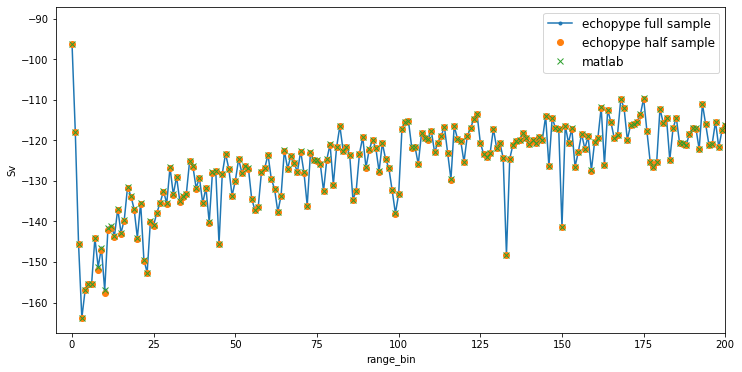

In [7]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ds_ep_orig.Sv.isel(frequency=0, ping_time=0).plot(marker='.', label='echopype full sample')
ds_ep.Sv.isel(frequency=0, ping_time=0).plot(marker='o', linestyle='none', label='echopype half sample')
ds_matlab.Sv.isel(frequency=0, ping_time=0).plot(marker='x', linestyle='none', label='matlab')
plt.xlim(-5, 200)
plt.legend(fontsize=12)
plt.show()

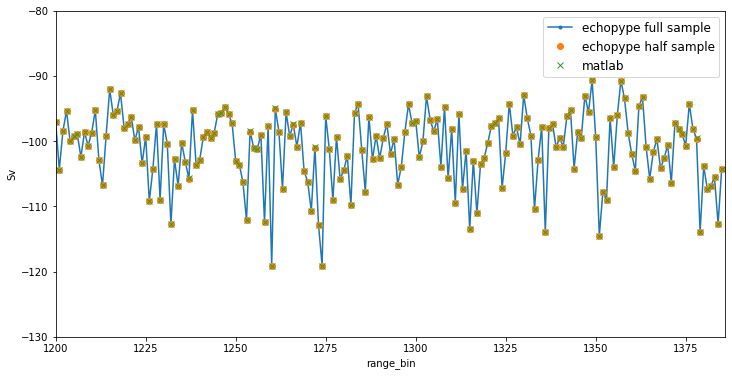

In [8]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ds_ep_orig.Sv.isel(frequency=0, ping_time=0).plot(marker='.', label='echopype full sample')
ds_ep.Sv.isel(frequency=0, ping_time=0).plot(marker='o', linestyle='none', label='echopype half sample')
ds_matlab.Sv.isel(frequency=0, ping_time=0).plot(marker='x', linestyle='none', label='matlab')
plt.xlim(1200, 1386)
plt.ylim(-130, -80)
plt.legend(fontsize=12)
plt.show()

## Compare Echopype and EchoView

In [9]:
df_ev_new = df_ev.iloc[:, 13:]
df_ev_new.shape

(10, 1385)

In [10]:
df_ev_new = df_ev_new.T.reset_index(drop=True)

The df is one element less than the Echopype outputs:

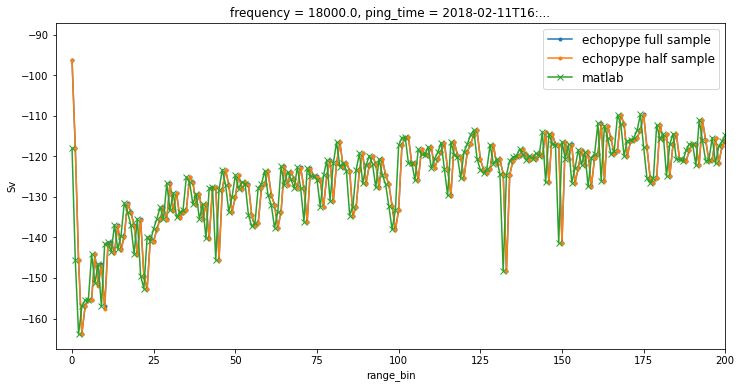

In [11]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ds_ep_orig.Sv.isel(frequency=0, ping_time=0).plot(marker='.', label='echopype full sample')
ds_ep.Sv.isel(frequency=0, ping_time=0).plot(marker='.', label='echopype half sample')
df_ev_new.iloc[:, 0].plot(marker='x', label='matlab')
plt.xlim(-5, 200)
plt.legend(fontsize=12)
plt.show()

We can see that there is a one-element shift in the `range_bin` dimension.

### Check range in meters

In [12]:
ev_range_start = df_ev.iloc[0, 8]
ev_range_stop = df_ev.iloc[0, 9]
(ev_range_start, ev_range_stop)

(0.0938239998, 259.9863033436)

In [13]:
ev_range = np.linspace(ev_range_start, ev_range_stop, df_ev_new.shape[0])
ev_range.shape

(1385,)

In [14]:
ep_range = ds_ep.range.isel(frequency=0, ping_time=0).values
ep_range.shape

(1386,)

In [15]:
ep_range_orig = ds_ep_orig.range.isel(frequency=0, ping_time=0).values
ep_range_orig.shape

(1386,)

In [16]:
np.vstack((ev_range[:10], ep_range[:10], ep_range_orig[:10])).T

array([[0.093824  , 0.        , 0.        ],
       [0.28160758, 0.        , 0.        ],
       [0.46939117, 0.        , 0.        ],
       [0.65717475, 0.093824  , 0.187648  ],
       [0.84495833, 0.281472  , 0.375296  ],
       [1.03274192, 0.46912   , 0.562944  ],
       [1.2205255 , 0.656768  , 0.750592  ],
       [1.40830908, 0.844416  , 0.93824   ],
       [1.59609267, 1.032064  , 1.125888  ],
       [1.78387625, 1.219712  , 1.313536  ]])

In [17]:
df_ev_new.iloc[:, 0].shape

(1385,)

In [18]:
ev_range.shape

(1385,)

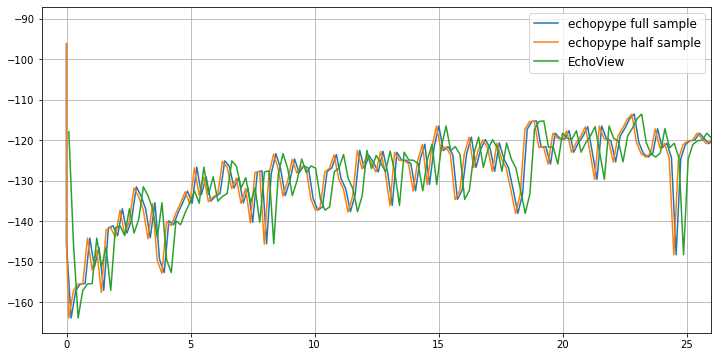

In [19]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plt.plot(ep_range_orig, ds_ep_orig.Sv.isel(frequency=0, ping_time=0).values, label='echopype full sample')
plt.plot(ep_range, ds_ep.Sv.isel(frequency=0, ping_time=0).values, label='echopype half sample')
plt.plot(ev_range, df_ev_new.iloc[:, 0], label='EchoView')
plt.xlim(-1, 26)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [20]:
np.vstack((df_ev_new.iloc[:10, 0].values, 
           ds_matlab.Sv.isel(frequency=0, ping_time=0, range_bin=slice(1, 11)).values,
           ds_ep_orig.Sv.isel(frequency=0, ping_time=0, range_bin=slice(1, 11)).values,
           ds_ep.Sv.isel(frequency=0, ping_time=0, range_bin=slice(1, 11)).values),
         ).T

array([[-117.896268  , -117.89627075, -117.8962651 , -117.8962651 ],
       [-145.647471  , -145.64746094, -145.64746291, -145.64746291],
       [-163.83862   , -163.8374939 , -163.83748224, -163.838046  ],
       [-157.018409  , -157.0161438 , -157.01614903, -157.01671279],
       [-155.454464  , -155.45108032, -155.45107192, -155.45163568],
       [-155.348633  , -155.34411621, -155.3441247 , -155.34468846],
       [-144.130562  , -144.12492371, -144.12491856, -144.12548232],
       [-151.23111   , -151.23110962, -151.23110954, -151.98744452],
       [-146.492701  , -146.4927063 , -146.49270028, -147.13695771],
       [-157.020164  , -157.02017212, -157.02016461, -157.58130284]])

In [21]:
spreading_loss_orig = 20 * np.log10(np.where(ep_range_orig >= 1, ep_range_orig, 1))
spreading_loss = 20 * np.log10(np.where(ep_range >= 1, ep_range, 1))

In [22]:
ep_range_orig

array([  0.        ,   0.        ,   0.        , ..., 259.14188735,
       259.32953535, 259.51718334])

In [23]:
absorption_loss_orig = 2 * ds_env['absorption_indicative'].isel(frequency=0, ping_time=0).values * ep_range_orig
absorption_loss = 2 * ds_env['absorption_indicative'].isel(frequency=0, ping_time=0).values * ep_range

In [24]:
np.vstack((spreading_loss_orig[:10], spreading_loss[:10])).T

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [1.02990378, 0.27413257],
       [2.36883958, 1.72514591]])

In [25]:
np.vstack((absorption_loss_orig[:10], absorption_loss[:10])).T

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.00112752, 0.00056376],
       [0.00225504, 0.00169128],
       [0.00338257, 0.00281881],
       [0.00451009, 0.00394633],
       [0.00563761, 0.00507385],
       [0.00676513, 0.00620137],
       [0.00789266, 0.00732889]])

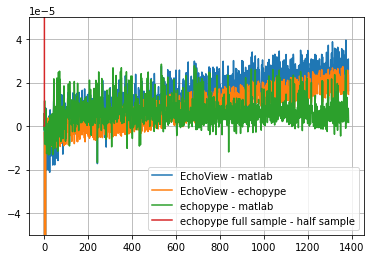

In [62]:
plt.plot(df_ev_new.iloc[:, 0].values 
         - ds_matlab.Sv.isel(frequency=0, ping_time=0).values[1:], label='EchoView - matlab')
plt.plot(df_ev_new.iloc[:, 0].values 
         - ds_ep_orig.Sv.isel(frequency=0, ping_time=0).values[1:], label='EchoView - echopype')
plt.plot(ds_ep_orig.Sv.isel(frequency=0, ping_time=0).values[1:] 
         - ds_matlab.Sv.isel(frequency=0, ping_time=0).values[1:], label='echopype - matlab')
plt.plot(ds_ep_orig.Sv.isel(frequency=0, ping_time=0).values[1:] 
         - ds_ep.Sv.isel(frequency=0, ping_time=0).values[1:], label='echopype full sample - half sample')
plt.legend()
plt.grid()
plt.ylim(-5e-5, 5e-5)
plt.show()

In [48]:
ep_range_orig[:10]

array([0.      , 0.      , 0.      , 0.187648, 0.375296, 0.562944,
       0.750592, 0.93824 , 1.125888, 1.313536])

In [49]:
ep_range[:10]

array([0.      , 0.      , 0.      , 0.093824, 0.281472, 0.46912 ,
       0.656768, 0.844416, 1.032064, 1.219712])

In [50]:
ep_range_orig[:10] - ep_range[:10]

array([0.      , 0.      , 0.      , 0.093824, 0.093824, 0.093824,
       0.093824, 0.093824, 0.093824, 0.093824])

In [52]:
(ep_range_orig - ep_range)[:15]

array([0.      , 0.      , 0.      , 0.093824, 0.093824, 0.093824,
       0.093824, 0.093824, 0.093824, 0.093824, 0.093824, 0.093824,
       0.093824, 0.093824, 0.093824])

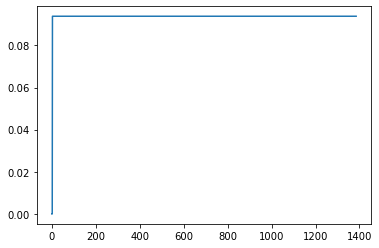

In [47]:
plt.plot(ep_range_orig - ep_range)

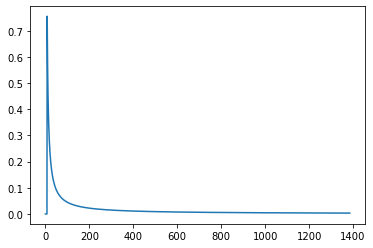

In [46]:
plt.plot(spreading_loss_orig - spreading_loss)

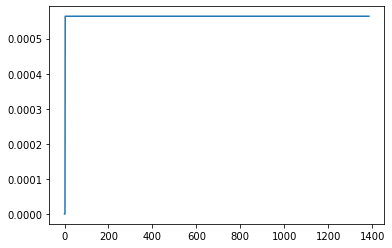

In [44]:
plt.plot(absorption_loss_orig - absorption_loss)